In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [34]:
#read the data
cab_df = pd.read_csv('Cab_Data.csv')
city_df = pd.read_csv('City.csv')
customer_df = pd.read_csv('Customer_ID.csv')
transaction_df = pd.read_csv('Transaction_ID.csv')

Data Exploration

CAB DATA

In [35]:
#Preview the cab dataset
cab_df.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [36]:
cab_df.tail()

Transaction ID  Date of Travel     Company           City  \
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
359387          4.80          69.24       63.3600  
359388          8.40         113.75      106.8480  
359389         27.75         437.07      349.6500  
359390          8.80         146.19      114.0480  
359391         12.76         191.58      177.6192

In [37]:
#Preview data shape
cab_df.shape

(359392, 7)

In [38]:
cab_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [39]:
# change the type of Date of Travel datatype into DateTime 
a = cab_df['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
cab_df['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [40]:
cab_df.describe()

Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000

In [42]:
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [43]:
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

CITY DATA

In [44]:
city_df.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [45]:
city_df.tail()

City Population      Users
15  SACRAMENTO CA   545,776      7,044 
16  PITTSBURGH PA   542,085      3,643 
17  WASHINGTON DC   418,859    127,001 
18   NASHVILLE TN   327,225      9,270 
19      BOSTON MA   248,968     80,021

In [46]:
city_df.shape

(20, 3)

In [47]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [48]:
# Attribute 'Population' should be an integer
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(float)

# Attribute 'Users' should be an integer
city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(float)

In [49]:
# Now check the type
city_df.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [50]:
city_df.describe()

Population          Users
count  2.000000e+01      20.000000
mean   1.231592e+06   64520.650000
std    1.740127e+06   83499.375289
min    2.489680e+05    3643.000000
25%    6.086372e+05   11633.250000
50%    7.845590e+05   23429.000000
75%    1.067041e+06   91766.000000
max    8.405837e+06  302149.000000

CUSTOMER DATA

In [51]:
customer_df.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [52]:
customer_df.tail()

Customer ID  Gender  Age  Income (USD/Month)
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

In [53]:
customer_df.shape

(49171, 4)

In [54]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [55]:
customer_df.describe( include = 'all')

Customer ID Gender           Age  Income (USD/Month)
count   49171.000000  49171  49171.000000        49171.000000
unique           NaN      2           NaN                 NaN
top              NaN   Male           NaN                 NaN
freq             NaN  26562           NaN                 NaN
mean    28398.252283    NaN     35.363121        15015.631856
std     17714.137333    NaN     12.599066         8002.208253
min         1.000000    NaN     18.000000         2000.000000
25%     12654.500000    NaN     25.000000         8289.500000
50%     27631.000000    NaN     33.000000        14656.000000
75%     43284.500000    NaN     42.000000        21035.000000
max     60000.000000    NaN     65.000000        35000.000000

TRANSACTIONS

In [56]:
transaction_df.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [57]:
transaction_df.tail()

Transaction ID  Customer ID Payment_Mode
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

In [58]:
transaction_df.shape

(440098, 3)

In [59]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [60]:
transaction_df.describe(include = 'all', datetime_is_numeric=True)

Transaction ID    Customer ID Payment_Mode
count     4.400980e+05  440098.000000       440098
unique             NaN            NaN            2
top                NaN            NaN         Card
freq               NaN            NaN       263991
mean      1.022006e+07   23619.513120          NaN
std       1.270455e+05   21195.549816          NaN
min       1.000001e+07       1.000000          NaN
25%       1.011004e+07    3530.000000          NaN
50%       1.022006e+07   15168.000000          NaN
75%       1.033008e+07   43884.000000          NaN
max       1.044011e+07   60000.000000          NaN

MERGE DATA

In [63]:
df= cab_df.merge(transaction_df, on= 'Transaction ID').merge(customer_df, on ='Customer ID').merge(city_df, on = 'City')
df.head()

Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-07    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-20  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-22  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-05    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-20  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350        29290         Card   Male   28   
1         598.70      317.4228        29290         Cash   Male   28   
2         792.05      597.4020        29290         Card   Male   28   
3         358.52      334.8540        27703         Card   Male   27   
4         721.10      467.1192        27703         Card   Male   27   

   Income (USD/Month)  Population    Users  
0               10813    814885.0  24701.0  
1               10813    814885.0  24701.0  
2               10813    814885.0  24701.0  
3                9237    814885.0  24701.0  
4                9237    814885.0  24701.0

In [64]:
df.tail()

Transaction ID Date of Travel     Company           City  \
359387        10307228     2018-03-02  Yellow Cab  WASHINGTON DC   
359388        10319775     2018-04-12  Yellow Cab  WASHINGTON DC   
359389        10347676     2018-07-05  Yellow Cab  WASHINGTON DC   
359390        10358624     2018-08-01  Yellow Cab  WASHINGTON DC   
359391        10370709     2018-08-29  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
359387         38.40         668.93      525.3120        51406         Cash   
359388          3.57          67.60       44.5536        51406         Cash   
359389         23.46         331.97      337.8240        51406         Card   
359390         27.60         358.23      364.3200        51406         Cash   
359391         34.24         453.11      427.3152        51406         Card   

        Gender  Age  Income (USD/Month)  Population     Users  
359387  Female   29                6829    418859.0  127001.0  
359388  Female   29                6829    418859.0  127001.0  
359389  Female   29                6829    418859.0  127001.0  
359390  Female   29                6829    418859.0  127001.0  
359391  Female   29                6829    418859.0  127001.0

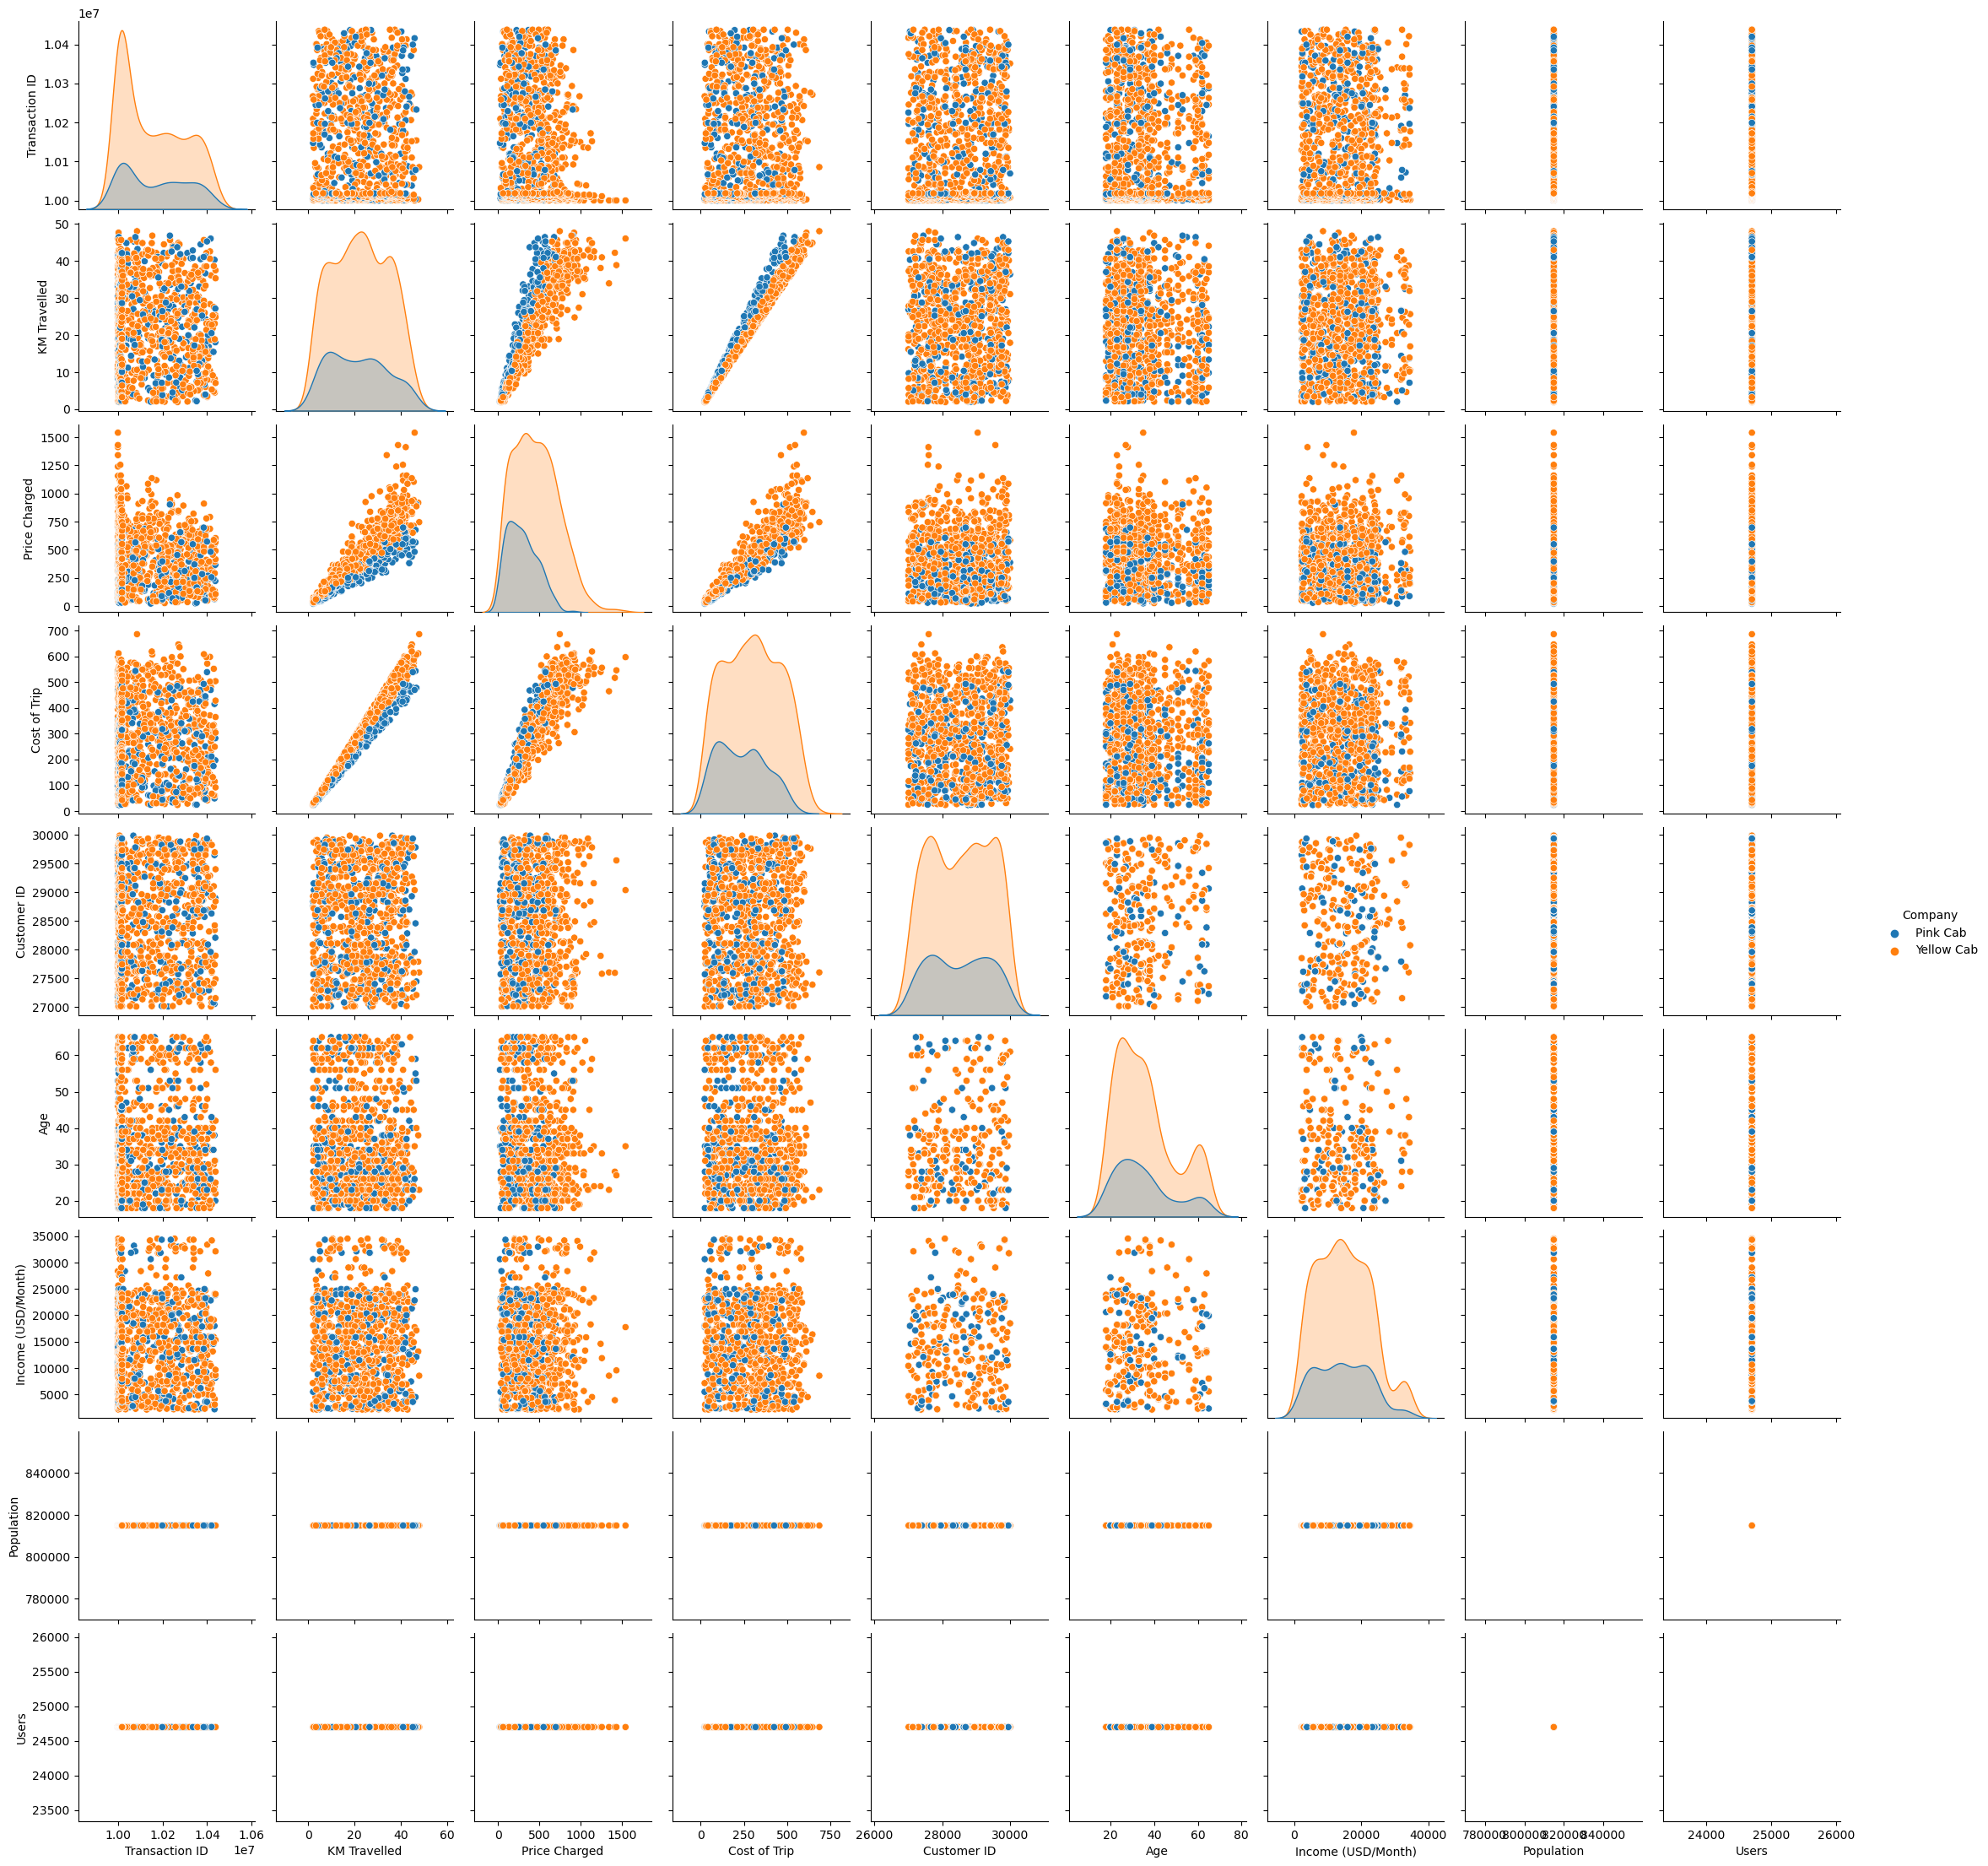

In [65]:
sns.pairplot(df.head(1000), hue = 'Company')

Check The Correlation

In [66]:
data_corr = df.corr()
data_corr

Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Transaction ID            1.000000     -0.001429      -0.052902     -0.003462   
KM Travelled             -0.001429      1.000000       0.835753      0.981848   
Price Charged            -0.052902      0.835753       1.000000      0.859812   
Cost of Trip             -0.003462      0.981848       0.859812      1.000000   
Customer ID              -0.016912      0.000389      -0.177324      0.003077   
Age                      -0.001267     -0.000369      -0.003084     -0.000189   
Income (USD/Month)       -0.001570     -0.000544       0.003228     -0.000633   
Population                0.023868     -0.002311       0.326589      0.015108   
Users                     0.013526     -0.000428       0.281061      0.023628   

                    Customer ID       Age  Income (USD/Month)  Population  \
Transaction ID        -0.016912 -0.001267           -0.001570    0.023868   
KM Travelled           0.000389 -0.000369           -0.000544   -0.002311   
Price Charged         -0.177324 -0.003084            0.003228    0.326589   
Cost of Trip           0.003077 -0.000189           -0.000633    0.015108   
Customer ID            1.000000 -0.004735           -0.013608   -0.647052   
Age                   -0.004735  1.000000            0.003907   -0.009002   
Income (USD/Month)    -0.013608  0.003907            1.000000    0.011868   
Population            -0.647052 -0.009002            0.011868    1.000000   
Users                 -0.610742 -0.005906            0.010464    0.915490   

                       Users  
Transaction ID      0.013526  
KM Travelled       -0.000428  
Price Charged       0.281061  
Cost of Trip        0.023628  
Customer ID        -0.610742  
Age                -0.005906  
Income (USD/Month)  0.010464  
Population          0.915490  
Users               1.000000

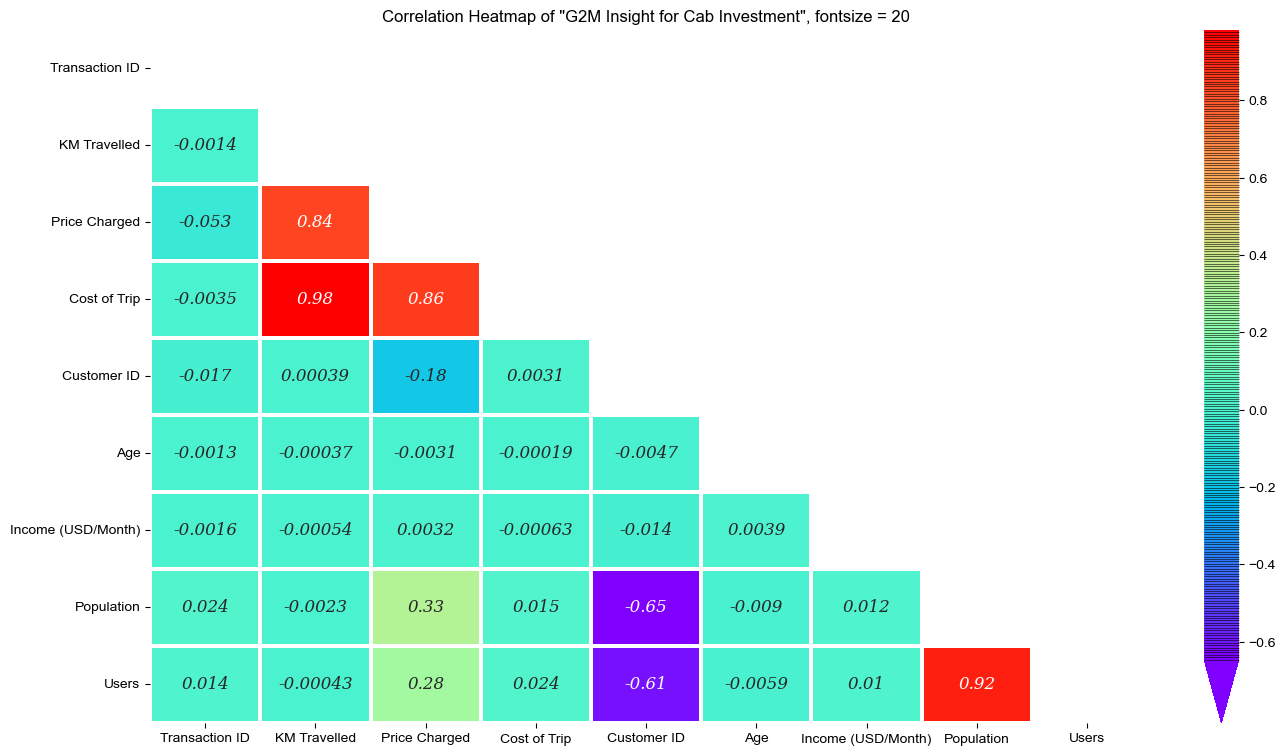

In [68]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':12,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(data_corr)

# Generate heatmap correlation
ax = sns.heatmap(data_corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of "G2M Insight for Cab Investment", fontsize = 20')

# Set the size of text
sns.set(font_scale = 1.2)

In [69]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 

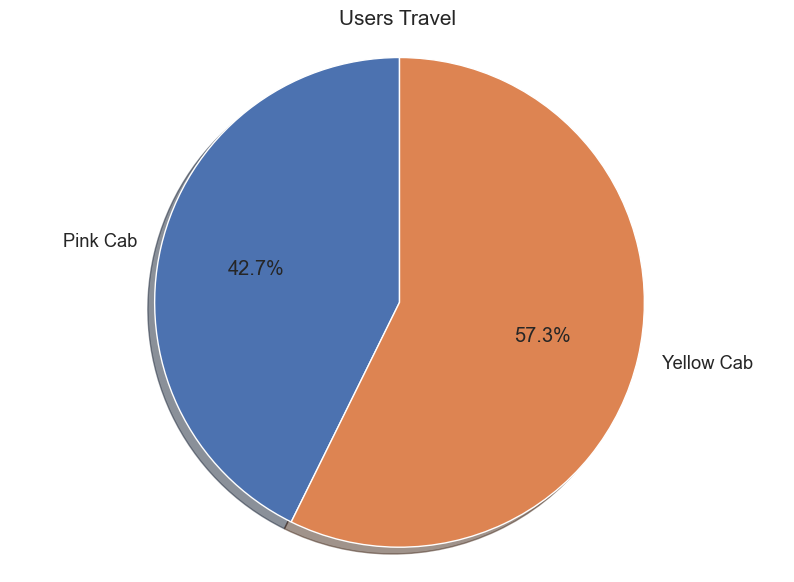

In [70]:
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

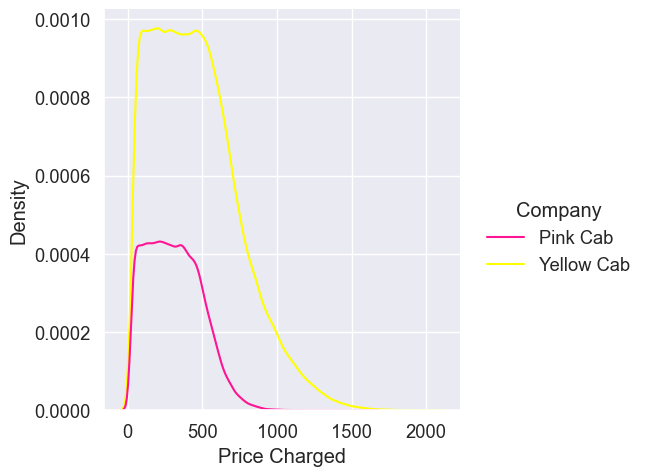

In [72]:
color = ["deeppink","yellow"]
sns.set_palette(sns.color_palette(color))
sns.displot(data=cab_df,x="Price Charged",kind="kde",hue="Company");

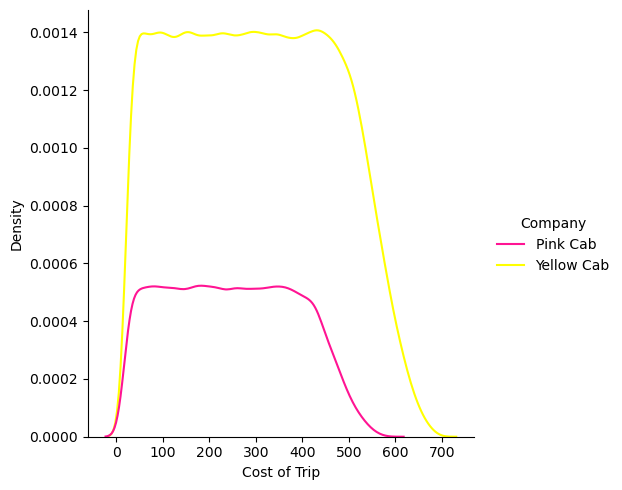

In [56]:
color = ["deeppink","yellow"]
sns.set_palette(sns.color_palette(color))
sns.displot(data=cab,x="Cost of Trip",kind="kde",hue="Company");

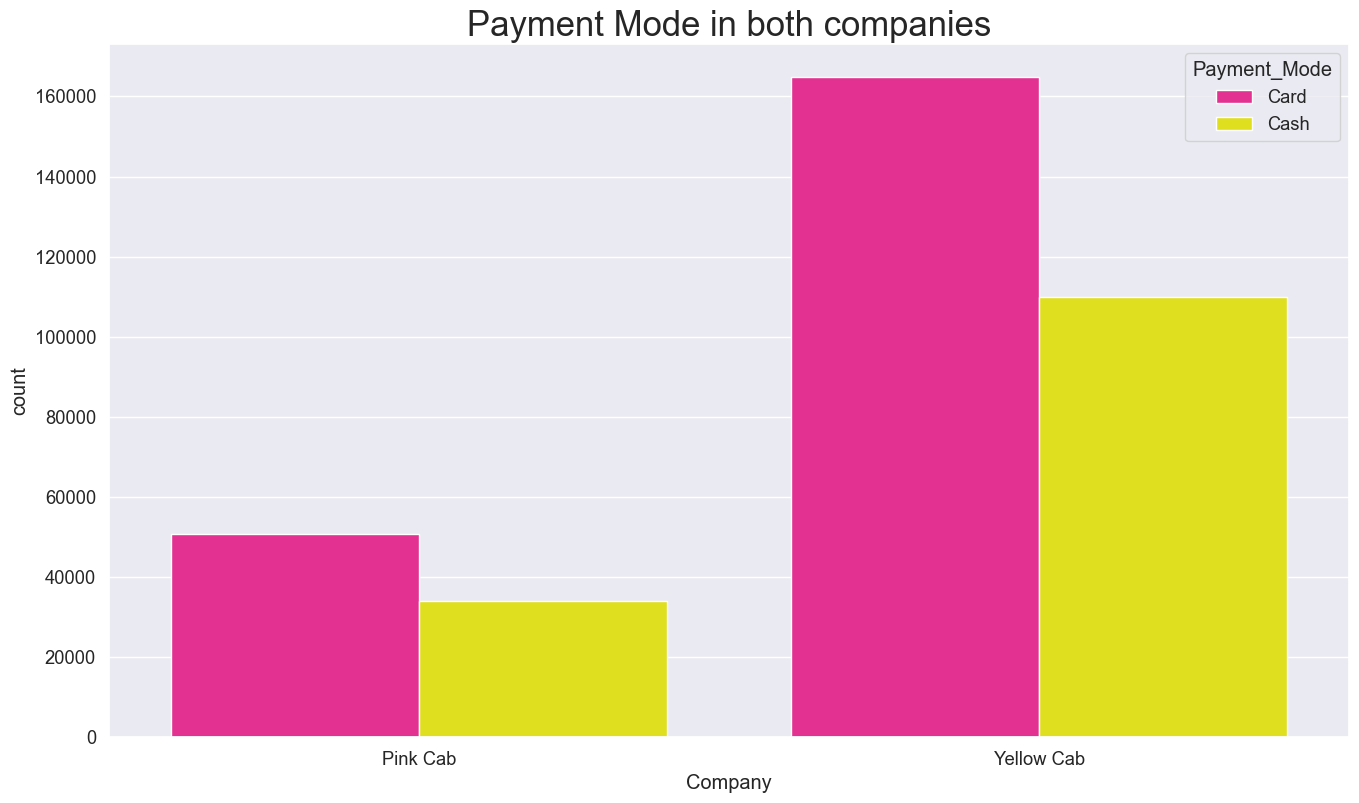

In [73]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

In [75]:
gender_cab=df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


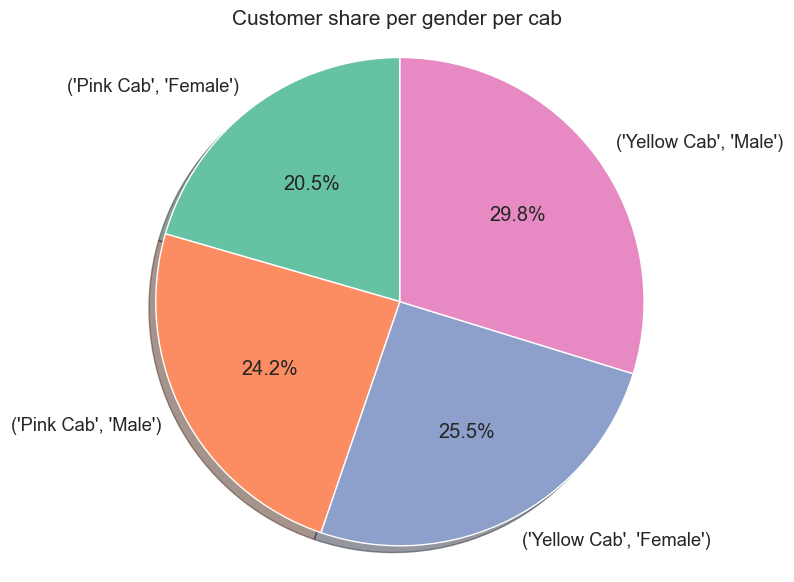

In [85]:
labs = gender_cab.index
sns.set_palette("Set2")
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals, labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

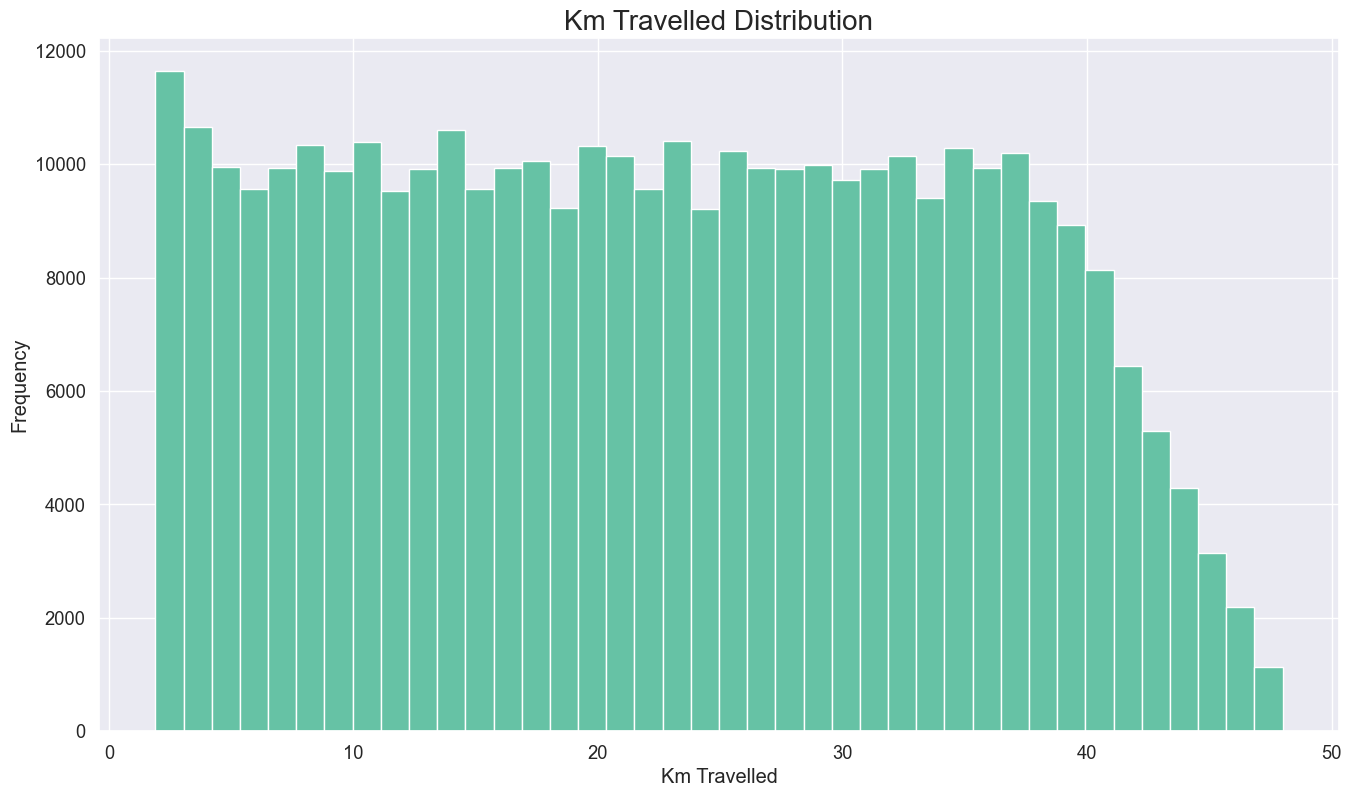

In [86]:
plt.figure(figsize = (16, 9))
plt.hist(df['KM Travelled'], bins = 40)
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

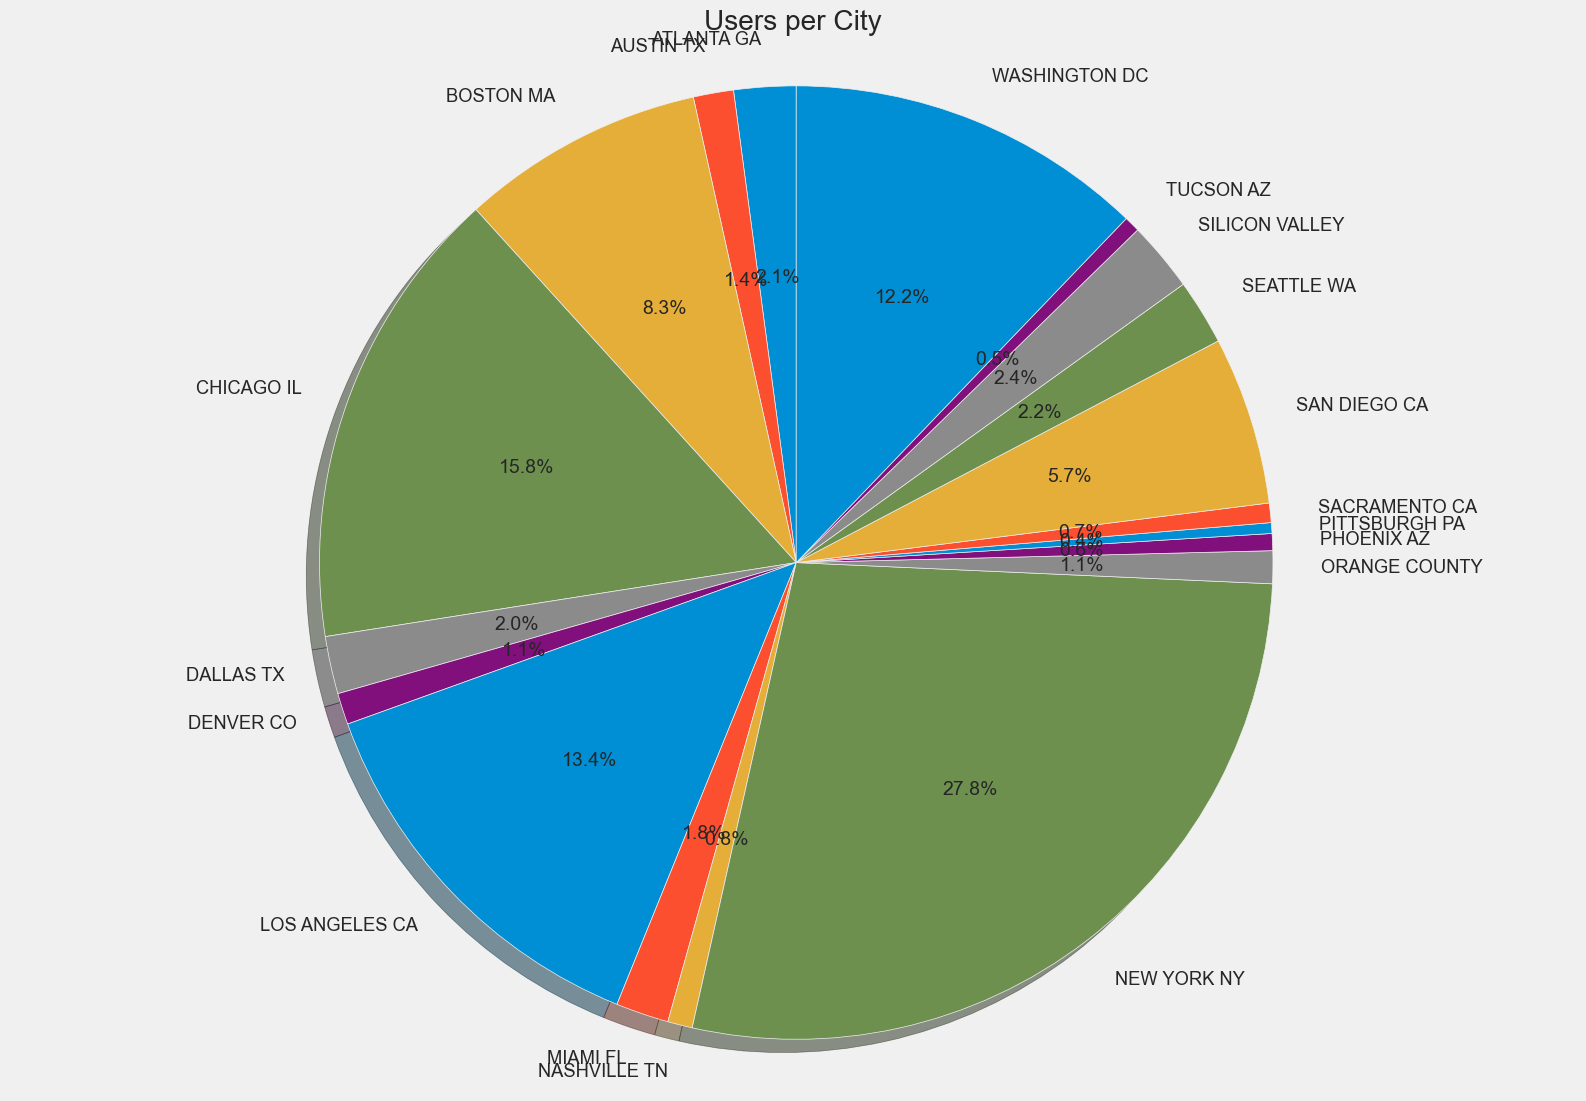

In [87]:
city_users = df.groupby('City')
city_users = city_users.Users.count()
labs = city_users.index
vals = city_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

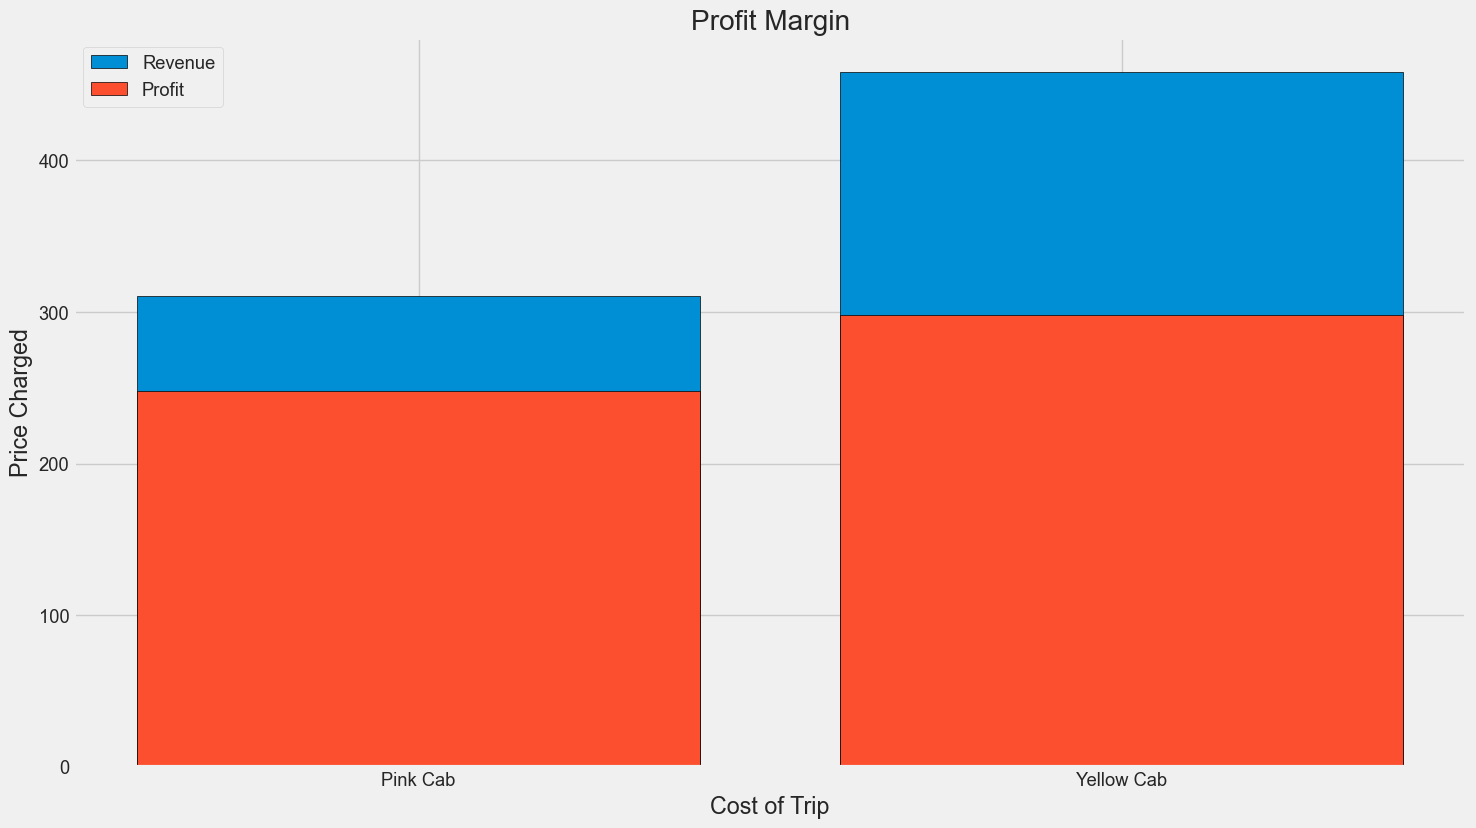

In [89]:
company = df.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

In [90]:
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

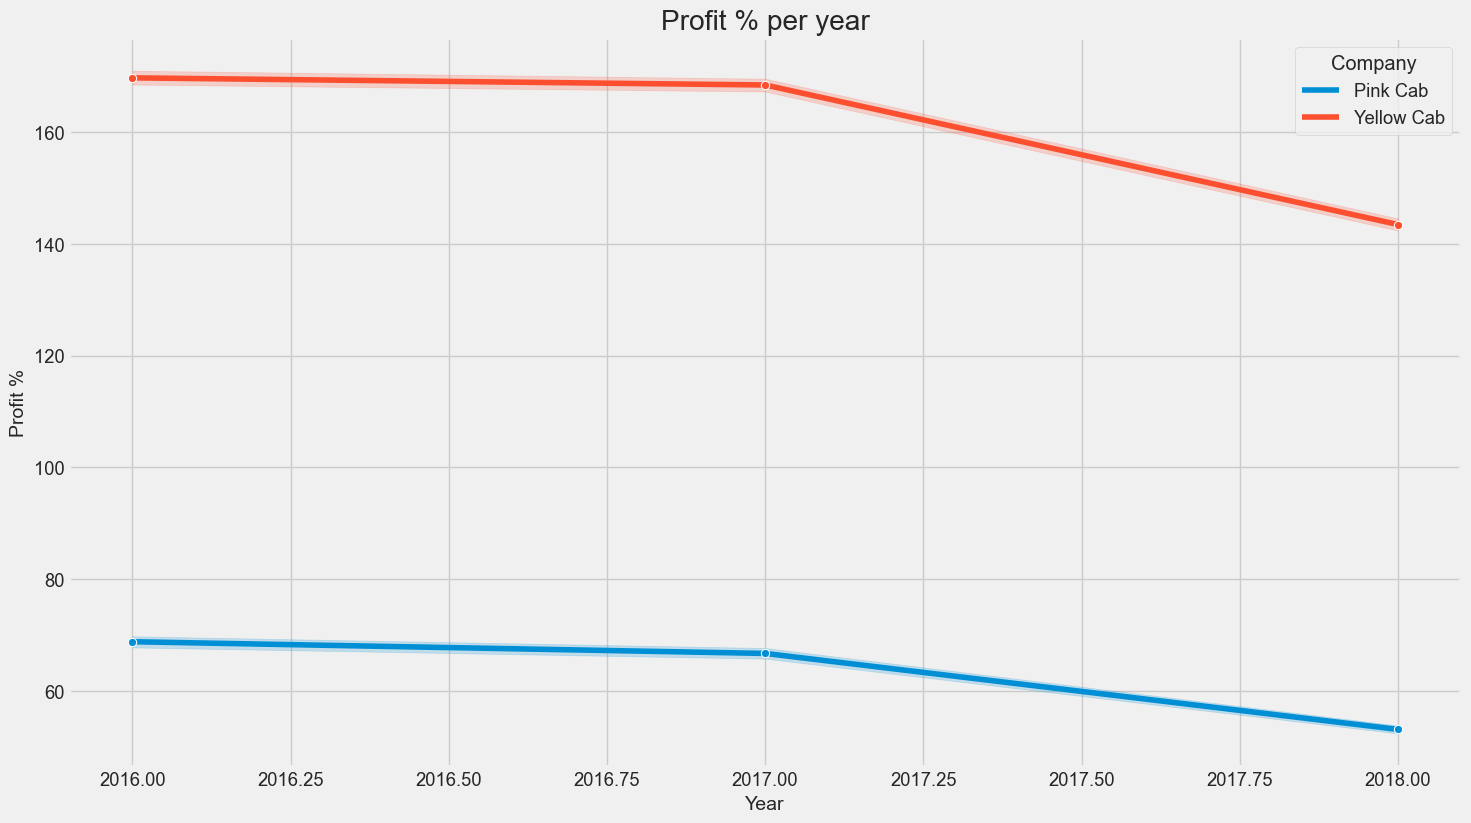

In [91]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

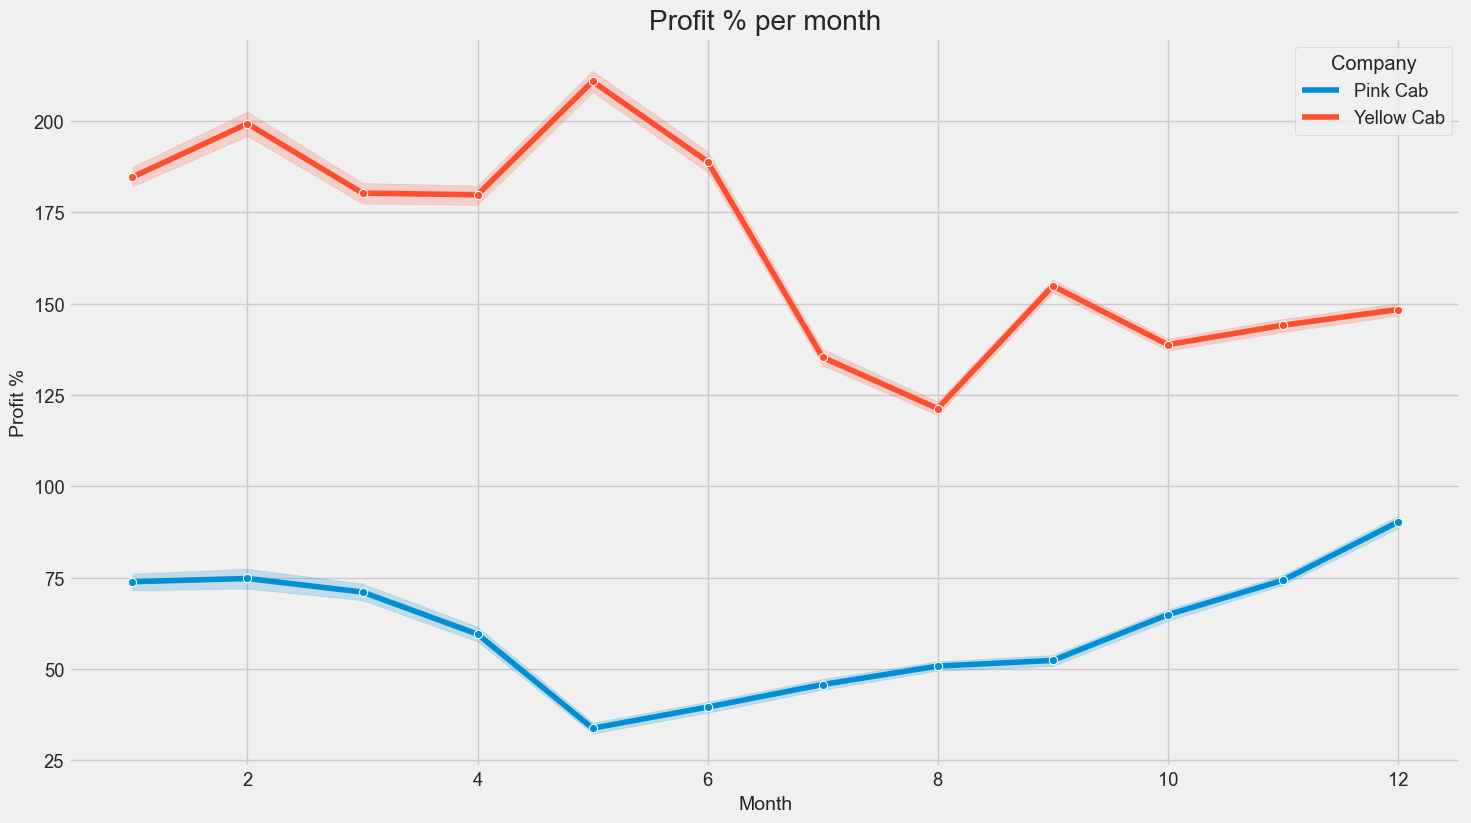

In [92]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

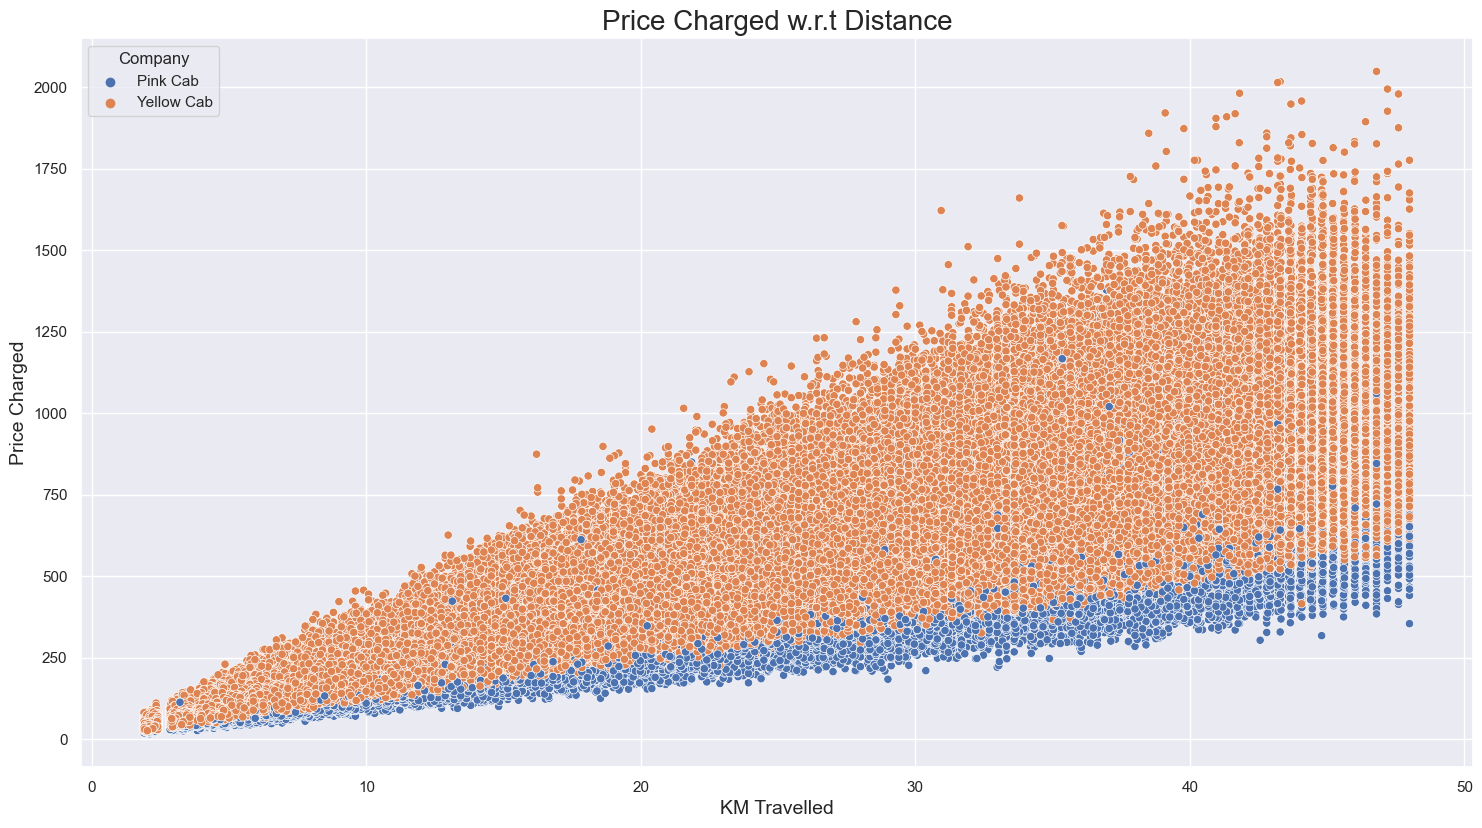

In [97]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()